In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Environment Ready for Loan Default Risk Project")

Environment Ready for Loan Default Risk Project


In [2]:
import os
print(os.getcwd())

C:\Loan_Default_Risk_Project\notebooks


In [3]:
df_sample = pd.read_csv(
    "../data/loan_data.csv",
    nrows=50000,
    low_memory=False
)

print("Sample Shape:", df_sample.shape)
df_sample.head()

Sample Shape: (50000, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sample["loan_status"].value_counts()

loan_status
Fully Paid            34978
Charged Off            9027
Current                5610
Late (31-120 days)      246
In Grace Period         100
Late (16-30 days)        38
Default                   1
Name: count, dtype: int64

In [5]:
def create_target(status):
    if status in ["Charged Off", "Default"]:
        return 1
    elif status == "Fully Paid":
        return 0
    else:
        return None

df_sample["target"] = df_sample["loan_status"].apply(create_target)


df_sample = df_sample.dropna(subset=["target"])

print("New Shape:", df_sample.shape)
df_sample["target"].value_counts()

C:\Users\omkar\AppData\Local\Temp\ipykernel_8816\3921521209.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample["target"] = df_sample["loan_status"].apply(create_target)


New Shape: (44006, 152)


target
0.0    34978
1.0     9028
Name: count, dtype: int64

In [6]:
df_sample = df_sample.copy()

In [7]:
default_rate = df_sample["target"].mean()
print("Default Rate:", round(default_rate * 100, 2), "%")

Default Rate: 20.52 %


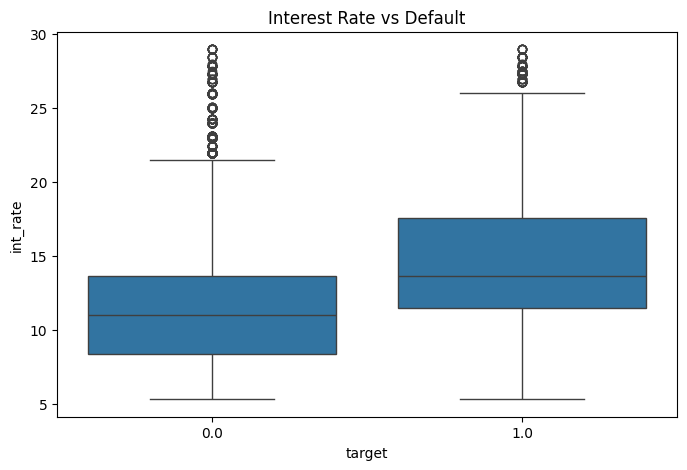

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="int_rate", data=df_sample)
plt.title("Interest Rate vs Default")
plt.show()

In [9]:
from scipy.stats import ttest_ind

default_group = df_sample[df_sample["target"] == 1]["int_rate"]
non_default_group = df_sample[df_sample["target"] == 0]["int_rate"]

t_stat, p_value = ttest_ind(default_group, non_default_group)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 68.78496309295058
P-Value: 0.0


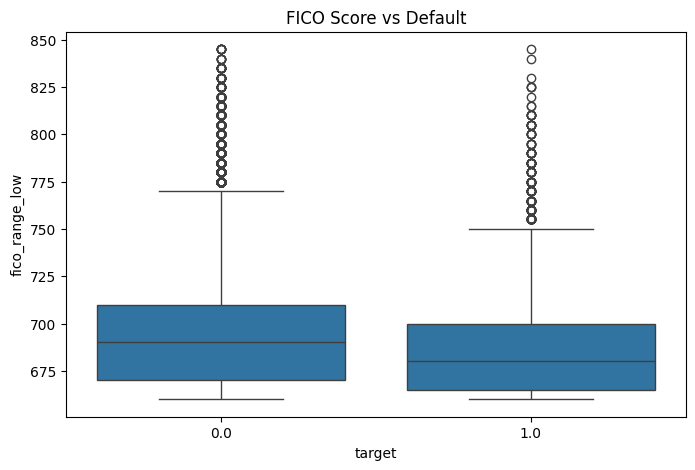

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="fico_range_low", data=df_sample)
plt.title("FICO Score vs Default")
plt.show()

In [11]:
from scipy.stats import ttest_ind

default_fico = df_sample[df_sample["target"] == 1]["fico_range_low"]
non_default_fico = df_sample[df_sample["target"] == 0]["fico_range_low"]

t_stat_fico, p_value_fico = ttest_ind(default_fico, non_default_fico)

print("FICO T-Statistic:", t_stat_fico)
print("FICO P-Value:", p_value_fico)

FICO T-Statistic: -29.09752541287153
FICO P-Value: 2.1720500619817488e-184


In [12]:
grade_default = (
    df_sample.groupby("grade")["target"]
    .mean()
    .sort_values()
)

print(grade_default)

grade
A    0.052775
B    0.137931
C    0.235010
D    0.352341
E    0.449531
F    0.527711
G    0.565445
Name: target, dtype: float64


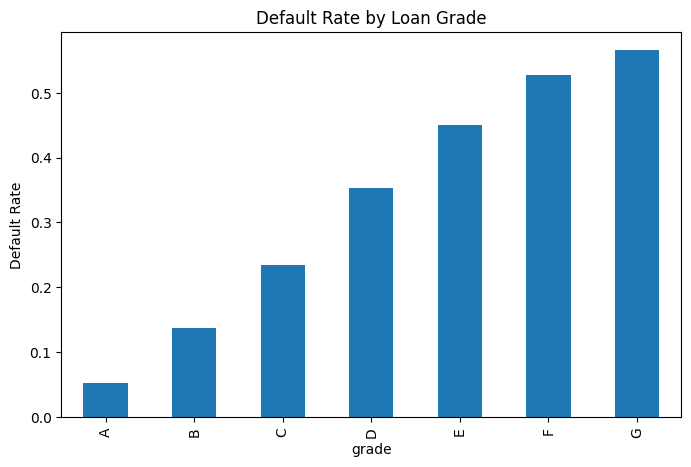

In [13]:
plt.figure(figsize=(8,5))
grade_default.plot(kind="bar")
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Rate")
plt.show()

In [14]:
print(df_sample["target"].value_counts(normalize=True))

target
0.0    0.794846
1.0    0.205154
Name: proportion, dtype: float64


In [15]:
features = [
    "loan_amnt",
    "int_rate",
    "annual_inc",
    "fico_range_low",
    "dti",
    "installment",
    "grade",
    "term",
    "home_ownership"
]

df_model = df_sample[features + ["target"]].copy()

print(df_model.shape)
df_model.head()

(44006, 10)


,loan_amnt,int_rate,annual_inc,fico_range_low,dti,installment,grade,term,home_ownership,target
0,3600.0,13.99,55000.0,675.0,5.91,123.03,C,36 months,MORTGAGE,0.0
1,24700.0,11.99,65000.0,715.0,16.06,820.28,C,36 months,MORTGAGE,0.0
2,20000.0,10.78,63000.0,695.0,10.78,432.66,B,60 months,MORTGAGE,0.0
4,10400.0,22.45,104433.0,695.0,25.37,289.91,F,60 months,MORTGAGE,0.0
5,11950.0,13.44,34000.0,690.0,10.20,405.18,C,36 months,RENT,0.0


In [16]:
df_model.isnull().sum()

loan_amnt         0
int_rate          0
annual_inc        0
fico_range_low    0
dti               1
installment       0
grade             0
term              0
home_ownership    0
target            0
dtype: int64

In [17]:
df_model["dti"] = df_model["dti"].fillna(df_model["dti"].median())

In [18]:
df_model.isnull().sum()

loan_amnt         0
int_rate          0
annual_inc        0
fico_range_low    0
dti               0
installment       0
grade             0
term              0
home_ownership    0
target            0
dtype: int64

In [19]:
X = df_model.drop("target", axis=1)
y = df_model["target"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (44006, 9)
y shape: (44006,)


In [20]:
X = pd.get_dummies(
    X,
    columns=["grade", "term", "home_ownership"],
    drop_first=True
)

print("New X shape after encoding:", X.shape)
X.head()

New X shape after encoding: (44006, 16)


,loan_amnt,int_rate,annual_inc,fico_range_low,dti,installment,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,3600.0,13.99,55000.0,675.0,5.91,123.03,False,True,False,False,False,False,False,True,False,False
1,24700.0,11.99,65000.0,715.0,16.06,820.28,False,True,False,False,False,False,False,True,False,False
2,20000.0,10.78,63000.0,695.0,10.78,432.66,True,False,False,False,False,False,True,True,False,False
4,10400.0,22.45,104433.0,695.0,25.37,289.91,False,False,False,False,True,False,True,True,False,False
5,11950.0,13.44,34000.0,690.0,10.20,405.18,False,True,False,False,False,False,False,False,False,True


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (35204, 16)
Test Shape: (8802, 16)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[6787  209]
 [1540  266]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      6996
         1.0       0.56      0.15      0.23      1806

    accuracy                           0.80      8802
   macro avg       0.69      0.56      0.56      8802
weighted avg       0.76      0.80      0.75      8802


ROC-AUC Score: 0.7216057490849066


In [27]:
import numpy as np

# Change threshold from 0.5 to 0.3
y_pred_30 = (y_prob >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_30))
print(classification_report(y_test, y_pred_30))

[[5863 1133]
 [1016  790]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      6996
         1.0       0.41      0.44      0.42      1806

    accuracy                           0.76      8802
   macro avg       0.63      0.64      0.63      8802
weighted avg       0.76      0.76      0.76      8802



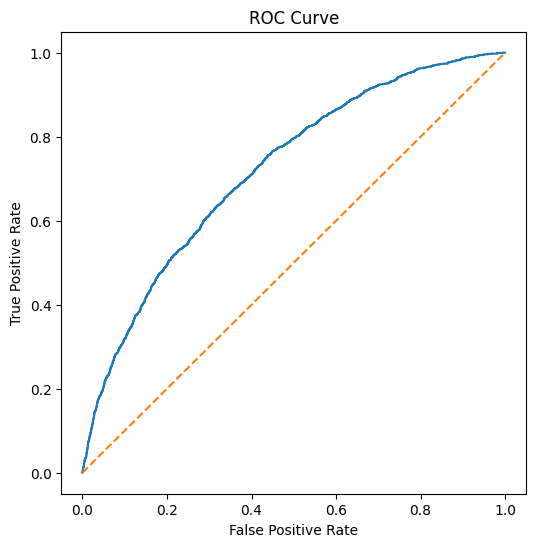

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

model_bal = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model_bal.fit(X_train_scaled, y_train)

y_pred_bal = model_bal.predict(X_test_scaled)
y_prob_bal = model_bal.predict_proba(X_test_scaled)[:, 1]

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_bal))

[[4669 2327]
 [ 643 1163]]
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76      6996
         1.0       0.33      0.64      0.44      1806

    accuracy                           0.66      8802
   macro avg       0.61      0.66      0.60      8802
weighted avg       0.77      0.66      0.69      8802

ROC-AUC: 0.7214021047939434


In [30]:
from sklearn.metrics import precision_recall_curve

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [32]:
import pandas as pd

pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

pr_df.head()

,threshold,precision,recall
0,0.013775,0.205181,1.0
1,0.016809,0.205204,1.0
2,0.016872,0.205227,1.0
3,0.017182,0.205251,1.0
4,0.017199,0.205274,1.0


In [33]:
pr_df[(pr_df["recall"] >= 0.55) & (pr_df["recall"] <= 0.60)].head(10)

,threshold,precision,recall
5710,0.224511,0.350259,0.599668
5711,0.224512,0.350372,0.599668
5712,0.224547,0.350485,0.599668
5713,0.224643,0.350599,0.599668
5714,0.224661,0.350712,0.599668
5715,0.224782,0.350826,0.599668
5716,0.224852,0.350616,0.599114
5717,0.224924,0.350405,0.598560
5718,0.224980,0.350195,0.598007
5719,0.225224,0.350308,0.598007


In [34]:
optimal_threshold = 0.26

y_pred_opt = (y_prob >= optimal_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

[[5455 1541]
 [ 866  940]]
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      6996
         1.0       0.38      0.52      0.44      1806

    accuracy                           0.73      8802
   macro avg       0.62      0.65      0.63      8802
weighted avg       0.76      0.73      0.74      8802



In [35]:
import joblib

joblib.dump(model, "loan_default_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
